In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [2]:
device=torch.device('cpu')

In [3]:
# Step 1. Prepare data-1/2
# DataLoader wraps a Dataset and provides minibatches, shuffling, multithreading, for you
data_in=np.loadtxt('./data/data_reserved/Re_100/input_u_fake.dat')
data_out=np.loadtxt('./data/data_reserved/Re_100/output_p.dat')
x=torch.Tensor(data_in)
y=torch.Tensor(data_out)

In [4]:
print(x.size())
print(y.size())

torch.Size([8000, 6724])
torch.Size([8000, 6724])


In [5]:
loader=DataLoader(TensorDataset(x, y), batch_size=200)
tol=1e-7

In [6]:
# Step 2. Create model 建立model習慣建立class
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, B, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear_1=torch.nn.Linear(D_in, H)
        self.linear_2=torch.nn.Linear(H, B)
        self.linear_3=torch.nn.Linear(B, D_out)
    
    # Step 3. Forward pass-1/2    # Step 4. Backward pass-1/2
    def forward(self, x):
        h=self.linear_1(x)
        h_relu=torch.nn.functional.relu(h) #為何activation and hidden layer 的實現方式不同
        b=self.linear_2(h_relu) 
        b_relu=torch.nn.functional.relu(b)
        y_pred=self.linear_3(b_relu) 
        return y_pred
    
model= TwoLayerNet(D_in=6724, H=1000, B=1000, D_out=6724)
model=model.to(device) #這行是什麼意思? A:将模型加载到相应的设备

In [7]:
optimizer=torch.optim.Adam(model.parameters(), lr=1e-4)

In [8]:
loss_epoch=[]
loss_values = []
loss=1
epochs=0

while(loss>tol):
    epochs=epochs+1
    
    for x_batch, y_batch in loader:
        # Forward pass
        y_pred=model(x_batch)
        loss=torch.nn.functional.mse_loss(y_pred, y_batch)
        
        # Backward pass
        loss.backward()
        
        # Update Weights
        optimizer.step()
        optimizer.zero_grad()
    
    loss_epoch.append(epochs)
    loss_values.append(loss.item())
    
    if epochs%1==0:
        print("Epochs: ", epochs, "; Loss: ", loss.item())
        
    loss=loss.item()

print("Epochs: ", epochs, "; Loss: ", loss.item())

#Plot loss function
from matplotlib import pyplot as plt
plt.plot(loss_epoch, loss_values)
plt.xlabel('epochs')
plt.ylabel('loss')

Epochs:  1 ; Loss:  0.0002648925001267344
Epochs:  2 ; Loss:  2.1911719159106724e-05
Epochs:  3 ; Loss:  2.1475043467944488e-05
Epochs:  4 ; Loss:  2.4106640921672806e-05
Epochs:  5 ; Loss:  2.233100531157106e-05
Epochs:  6 ; Loss:  1.9179093214916065e-05
Epochs:  7 ; Loss:  1.622617492103018e-05
Epochs:  8 ; Loss:  1.3851627045369241e-05
Epochs:  9 ; Loss:  1.1701579751388635e-05
Epochs:  10 ; Loss:  1.0931807082670275e-05
Epochs:  11 ; Loss:  9.338918061985169e-06
Epochs:  12 ; Loss:  7.753680620226078e-06
Epochs:  13 ; Loss:  7.147175438149134e-06
Epochs:  14 ; Loss:  6.510107141366461e-06
Epochs:  15 ; Loss:  6.50319134365418e-06
Epochs:  16 ; Loss:  5.832184342580149e-06
Epochs:  17 ; Loss:  6.631169526372105e-06
Epochs:  18 ; Loss:  5.821583727083635e-06
Epochs:  19 ; Loss:  5.632377906295005e-06
Epochs:  20 ; Loss:  5.443393092718907e-06
Epochs:  21 ; Loss:  5.031908585806377e-06
Epochs:  22 ; Loss:  4.6493514673784375e-06
Epochs:  23 ; Loss:  4.5929127736599185e-06
Epochs:  24 

Epochs:  188 ; Loss:  1.1194553053428535e-06
Epochs:  189 ; Loss:  1.4338691016746452e-06
Epochs:  190 ; Loss:  8.872581247487688e-07
Epochs:  191 ; Loss:  7.708857197030738e-07
Epochs:  192 ; Loss:  1.3198027772887144e-06
Epochs:  193 ; Loss:  1.6211481579375686e-06
Epochs:  194 ; Loss:  1.1129011454613646e-06
Epochs:  195 ; Loss:  1.1453993238319526e-06
Epochs:  196 ; Loss:  1.0420931175758597e-06
Epochs:  197 ; Loss:  1.1921661098313052e-06
Epochs:  198 ; Loss:  1.0995969432769925e-06
Epochs:  199 ; Loss:  1.1727369155778433e-06
Epochs:  200 ; Loss:  8.601680860920169e-07
Epochs:  201 ; Loss:  7.572467097816116e-07
Epochs:  202 ; Loss:  7.705858706685831e-07
Epochs:  203 ; Loss:  1.318250269832788e-06
Epochs:  204 ; Loss:  6.372192729031667e-07
Epochs:  205 ; Loss:  5.845187160957721e-07
Epochs:  206 ; Loss:  7.034141731310228e-07
Epochs:  207 ; Loss:  5.994746175019827e-07
Epochs:  208 ; Loss:  6.056628194528457e-07
Epochs:  209 ; Loss:  9.298198619944742e-07
Epochs:  210 ; Loss:  

Epochs:  374 ; Loss:  6.670875905001594e-07
Epochs:  375 ; Loss:  4.2040997527692525e-07
Epochs:  376 ; Loss:  4.872600811722805e-07
Epochs:  377 ; Loss:  5.294043603498721e-07
Epochs:  378 ; Loss:  3.3215397365893296e-07
Epochs:  379 ; Loss:  3.8149968872858153e-07
Epochs:  380 ; Loss:  3.116792299806548e-07
Epochs:  381 ; Loss:  2.915139134529454e-07
Epochs:  382 ; Loss:  2.0431967584499944e-07
Epochs:  383 ; Loss:  2.6178435064139194e-07
Epochs:  384 ; Loss:  2.1103957692503172e-07
Epochs:  385 ; Loss:  2.646238499437459e-07
Epochs:  386 ; Loss:  2.2282060285760963e-07
Epochs:  387 ; Loss:  3.644604760211223e-07
Epochs:  388 ; Loss:  3.432859045915393e-07
Epochs:  389 ; Loss:  3.513095805374178e-07
Epochs:  390 ; Loss:  4.525918484432623e-07
Epochs:  391 ; Loss:  3.107294048732001e-07
Epochs:  392 ; Loss:  3.671265176308225e-07
Epochs:  393 ; Loss:  4.043701267164579e-07
Epochs:  394 ; Loss:  2.1299400998486817e-07
Epochs:  395 ; Loss:  3.3568994695087895e-07
Epochs:  396 ; Loss:  2

Epochs:  559 ; Loss:  4.112955309665267e-07
Epochs:  560 ; Loss:  9.713072586237104e-07
Epochs:  561 ; Loss:  4.614676072378643e-07
Epochs:  562 ; Loss:  7.841804858799151e-07
Epochs:  563 ; Loss:  3.1136332268033584e-07
Epochs:  564 ; Loss:  4.204839569865726e-07
Epochs:  565 ; Loss:  2.8292677711760916e-07
Epochs:  566 ; Loss:  4.298049702811113e-07
Epochs:  567 ; Loss:  2.081231542661044e-07
Epochs:  568 ; Loss:  2.057530537058483e-07
Epochs:  569 ; Loss:  2.3236691504280316e-07
Epochs:  570 ; Loss:  1.6639955902064685e-07
Epochs:  571 ; Loss:  1.2403565108343173e-07
Epochs:  572 ; Loss:  1.5332290104197455e-07
Epochs:  573 ; Loss:  1.4874669318487577e-07
Epochs:  574 ; Loss:  1.7604540403226565e-07
Epochs:  575 ; Loss:  1.4941862502837466e-07
Epochs:  576 ; Loss:  1.9690018859819247e-07
Epochs:  577 ; Loss:  1.6423248894170683e-07
Epochs:  578 ; Loss:  1.5605964165388286e-07
Epochs:  579 ; Loss:  1.439363330746346e-07
Epochs:  580 ; Loss:  1.9798874006937695e-07
Epochs:  581 ; Loss

Epochs:  744 ; Loss:  5.176473791834724e-07
Epochs:  745 ; Loss:  5.146694093127735e-07
Epochs:  746 ; Loss:  3.754621502594091e-07
Epochs:  747 ; Loss:  4.836509788219701e-07
Epochs:  748 ; Loss:  4.535086475243588e-07
Epochs:  749 ; Loss:  3.3032512192221475e-07
Epochs:  750 ; Loss:  4.020217261313519e-07
Epochs:  751 ; Loss:  2.882011642668658e-07
Epochs:  752 ; Loss:  2.312703486495593e-07
Epochs:  753 ; Loss:  2.107457390820855e-07
Epochs:  754 ; Loss:  2.1714065212563582e-07
Epochs:  755 ; Loss:  2.27304269628803e-07
Epochs:  756 ; Loss:  3.543468665156979e-07
Epochs:  757 ; Loss:  2.1823370843776502e-07
Epochs:  758 ; Loss:  2.9779619126202306e-07
Epochs:  759 ; Loss:  2.0673574852025922e-07
Epochs:  760 ; Loss:  2.816713617903588e-07
Epochs:  761 ; Loss:  3.166253748076997e-07
Epochs:  762 ; Loss:  3.8583445416406903e-07
Epochs:  763 ; Loss:  2.234831555369965e-07
Epochs:  764 ; Loss:  3.424282510877674e-07
Epochs:  765 ; Loss:  1.6460063534395886e-07
Epochs:  766 ; Loss:  2.00

AttributeError: 'float' object has no attribute 'item'

Text(0, 0.5, 'loss')

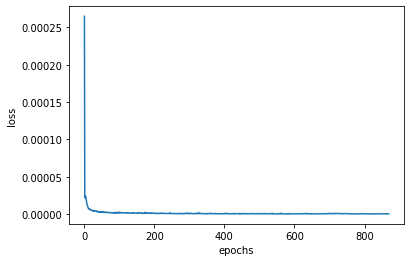

In [9]:
#Plot loss function
from matplotlib import pyplot as plt
plt.plot(loss_epoch, loss_values)
plt.xlabel('epochs')
plt.ylabel('loss')

In [10]:
PATH= "model.pth"
torch.save(model.state_dict(), PATH)

In [10]:
PATH= "model_jit_B.pth"
traced_net=torch.jit.trace(model, torch.randn(1,6724))
traced_net.to(torch.float64)
torch.jit.save(traced_net, PATH)